In [14]:
#import libs
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
#Merge CSVs
all_files = glob.glob(os.path.join("../data/raw/*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)

In [3]:
df = df_merged.copy()
df.head()

,Time,eNodeB Name,Cell FDD TDD Indication,Cell Name,LocalCell Id,eNodeB Function Name,Integrity,EPM_RRC_SR,EPM_UL_Traffic_GB,EPM_ERAB_DR,...,TE Availabity Daily,EPM_Dropped_Sessions,L.Cell.Unavail.Dur.Manual(s),L.Cell.Unavail.Dur.Sys(s),L.Cell.Avail.Dur(s),EPM_RRC_Failures,EPM_ERABSR_Failures,EPM_Total_Sessions,EPM_ERABSR_Attempts,EPM_RRC_Attempts
0,1/1/2022 0:00,LSINS26110_Site_6110,CELL_FDD,LSINS26110-1,1,LSINS26110_Site_6110,100%,100.0000,0.6307,0,...,100.0,0,0,0,3600,0,1,1903,1888,1879
1,1/1/2022 0:00,LSINS26110_Site_6110,CELL_FDD,LSINS26110-2,2,LSINS26110_Site_6110,100%,99.9791,1.9266,0.0808,...,100.0,4,0,0,3600,1,8,4950,4966,4777
2,1/1/2022 0:00,LSINS26110_Site_6110,CELL_FDD,LSINS26110-3,3,LSINS26110_Site_6110,100%,100.0000,1.2633,0.2432,...,100.0,13,0,0,3600,0,2,5345,5336,4961
3,1/1/2022 0:00,LSINS26110_Site_6110,CELL_FDD,LSINS26110-5,5,LSINS26110_Site_6110,100%,100.0000,0.0506,0.2096,...,100.0,1,0,0,3600,0,0,477,475,464
4,1/1/2022 0:00,LSINS26110_Site_6110,CELL_FDD,LSINS26110-6,6,LSINS26110_Site_6110,100%,100.0000,0.1649,0,...,100.0,0,0,0,3600,0,0,284,283,259


In [4]:
print("Total Number of Rows : {}".format(df.shape[0]))
print("Total Number of Features : {}".format(df.shape[1]))

Total Number of Rows : 7339983
Total Number of Features : 25


In [5]:
# Show uniqe values of each column
for i in range(df.shape[1]):
    print("###########################     {}    ###########################".format(df.columns[i]))
    print(df.iloc[:,i].unique())
    print(" ")
    print(" ")

###########################     Time    ###########################
['1/1/2022 0:00' '1/1/2022 1:00' '1/1/2022 2:00' '1/1/2022 3:00'
 '1/1/2022 4:00' '1/1/2022 5:00' '1/1/2022 6:00' '1/1/2022 7:00'
 '1/1/2022 8:00' '1/1/2022 9:00' '1/1/2022 10:00' '1/1/2022 11:00'
 '1/1/2022 12:00' '1/1/2022 13:00' '1/1/2022 14:00' '1/1/2022 15:00'
 '1/1/2022 16:00' '1/1/2022 17:00' '1/1/2022 18:00' '1/1/2022 19:00'
 '1/1/2022 20:00' '1/1/2022 21:00' '1/1/2022 22:00' '1/1/2022 23:00'
 '1/2/2022 0:00' '1/2/2022 1:00' '1/2/2022 2:00' '1/2/2022 3:00'
 '1/2/2022 4:00' '1/2/2022 5:00' '1/2/2022 6:00' '1/2/2022 7:00'
 '1/2/2022 8:00' '1/2/2022 9:00' '1/2/2022 10:00' '1/2/2022 11:00'
 '1/2/2022 12:00' '1/2/2022 13:00' '1/2/2022 14:00' '1/2/2022 15:00'
 '1/2/2022 16:00' '1/2/2022 17:00' '1/2/2022 18:00' '1/2/2022 19:00'
 '1/2/2022 20:00' '1/2/2022 21:00' '1/2/2022 22:00' '1/2/2022 23:00'
 '1/3/2022 0:00' '1/3/2022 1:00' '1/3/2022 2:00' '1/3/2022 3:00'
 '1/3/2022 4:00' '1/3/2022 5:00' '1/3/2022 6:00' '1/3/2022 

In [6]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(df)

,Total,Percent
EPM_CSFB_SR,1784145,0.243072
EPM_CSFB_Preparation_SR,1783542,0.242990
EPM_RRC_SR,455025,0.061993
EPM_ERAB_DR,431227,0.058750
EPM_ERAB_SR,422944,0.057622
TE Availabity Daily,0,0.000000
EPM_ERABSR_Attempts,0,0.000000
EPM_Total_Sessions,0,0.000000
EPM_ERABSR_Failures,0,0.000000
EPM_RRC_Failures,0,0.000000


In [7]:
#check duplicate rows
def check_duplicate(data):
    duplicate = data.duplicated()
    unique_data  = pd.Series(data.shape[0] - duplicate.value_counts()[1])
    duplicate_data = pd.Series(data.shape[0] - duplicate.value_counts()[0])
    unique_data_percent = pd.Series((unique_data/data.shape[0])*100)
    duplicate_data_percent = pd.Series((duplicate_data/data.shape[0])*100)
    dub = pd.concat([unique_data, duplicate_data,unique_data_percent,duplicate_data_percent], axis=1, keys=['Unique Count', 'Duplicate Count','Unique percent','Duplicate Percent'])
    return dub

check_duplicate(df)

,Unique Count,Duplicate Count,Unique percent,Duplicate Percent
0,6843810,496173,93.240134,6.759866


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339983 entries, 0 to 7339982
Data columns (total 25 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Time                          object 
 1   eNodeB Name                   object 
 2   Cell FDD TDD Indication       object 
 3   Cell Name                     object 
 4   LocalCell Id                  int64  
 5   eNodeB Function Name          object 
 6   Integrity                     object 
 7   EPM_RRC_SR                    float64
 8   EPM_UL_Traffic_GB             float64
 9   EPM_ERAB_DR                   object 
 10  EPM_ERAB_SR                   object 
 11  EPM_DL_Traffic_GB             float64
 12  EPM_CSFB_Preparation_SR       float64
 13  EPM_CSFB_SR                   float64
 14  TE Hourly Avala               float64
 15  TE Availabity Daily           float64
 16  EPM_Dropped_Sessions          int64  
 17  L.Cell.Unavail.Dur.Manual(s)  int64  
 18  L.Cell.Unavail.Dur.Sys

Text(0.5, 1.0, 'dataset correlation')

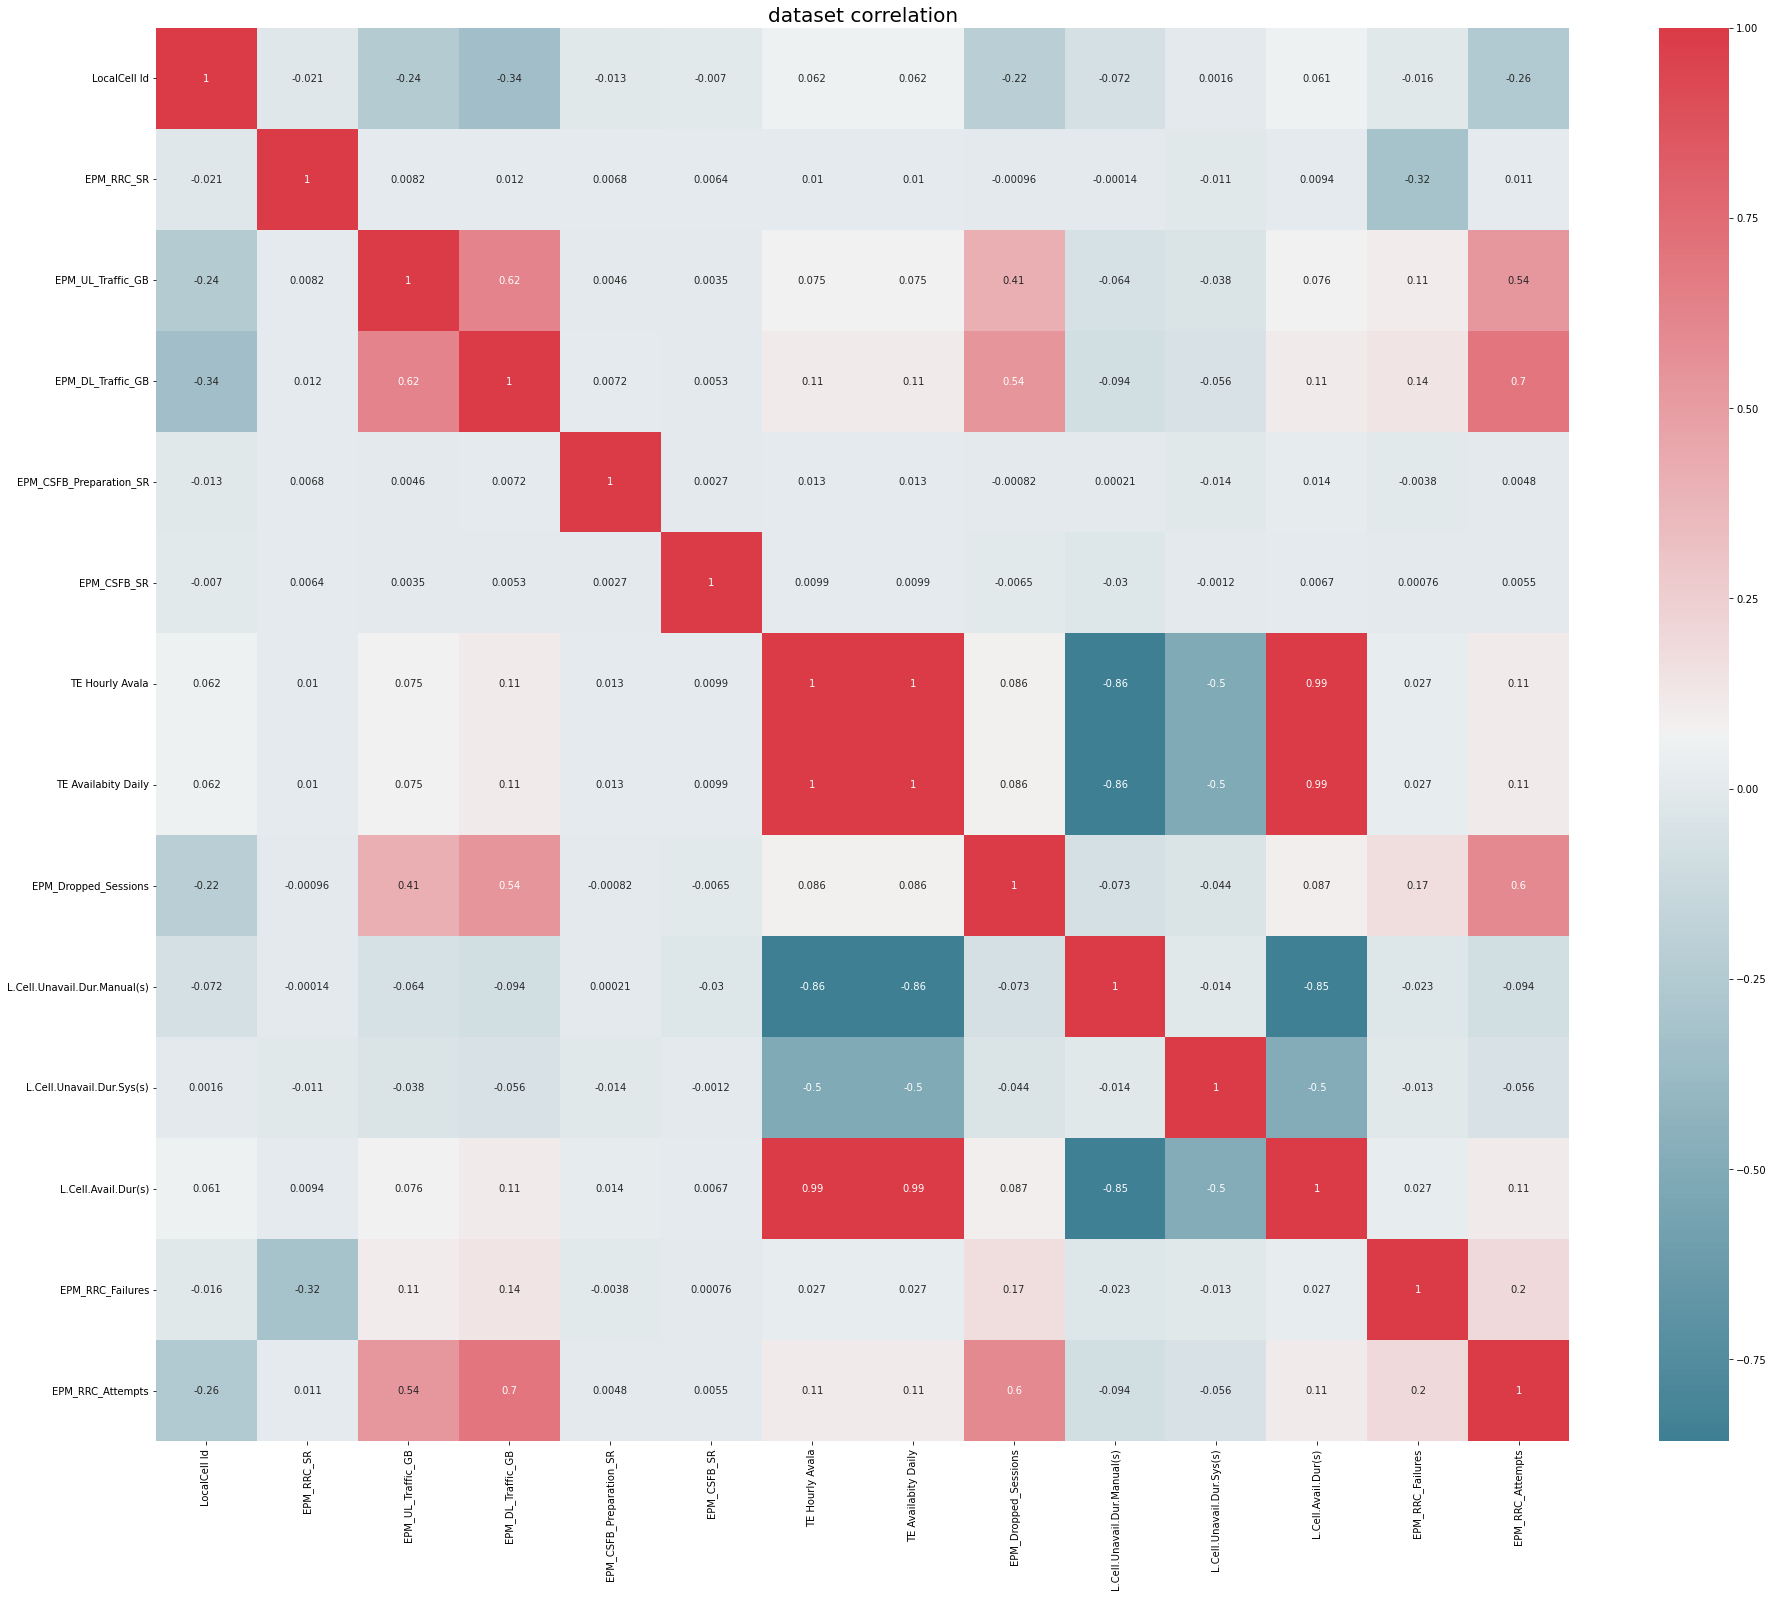

In [16]:
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.9:
            col_name = correlation_matrix.columns[i]
            correlated_features.add(col_name)
print(correlated_features)

{'L.Cell.Avail.Dur(s)', 'TE Availabity Daily'}


# Conclusion and Recommended actions

- there are missing values and duplicates should deal with them
- Time should be in datetime format not object format
- EPM_ERAB_DR, EPM_ERAB_SR, EPM_ERABSR_Failures, EPM_Total_Sessions, EPM_ERABSR_Attempts should be float or int not object
- correlated features should be droped